<a href="https://colab.research.google.com/github/FrancescaAvidano/MML/blob/main/AdultAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset description**

The dataset is Adult, link: http://archive.ics.uci.edu/ml/datasets/Adult \
It contains 48842 istances (32561 adult.data + 16281 adult.test) with 14 attributes.\
Aim: does a person earn more or less than 50K/year?

**ATTRIBUTES and VALUES**

age: continuous.\
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.\
fnlwgt: continuous.\
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.\
education-num: continuous.\
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.\
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.\
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.\
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.\
sex: Female, Male.\
capital-gain: continuous.\
capital-loss: continuous.\
hours-per-week: continuous.\
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

# **Install and import**

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 15.5 MB/s 
     |████████████████████████████████| 957 kB 41.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set_theme(style="whitegrid")

import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# **Dataset reading and first cleaning**

In [ ]:
#open and read adult.data

df_data = pd.read_csv("/content/gdrive/My Drive/MML/Dataset/adult.data", sep=', ',
                 names=["age", "workclass", "fnlwgt", "education","educationNum","maritalStatus","occupation","relationship","race","sex","capitalGain","capitalLoss","hoursPerWeek","nativeCountry","quantity"])
df_data

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,quantity
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#open and read adult.test

df_test_dirty1 = pd.read_csv("/content/gdrive/My Drive/MML/Dataset/adult.test", sep=', ',
                 names=["age", "workclass", "fnlwgt", "education","educationNum","maritalStatus","occupation","relationship","race","sex","capitalGain","capitalLoss","hoursPerWeek","nativeCountry","quantity"])
df_test_dirty2 = df_test_dirty1.drop(0)
df_test = df_test_dirty2.replace([">50K.","<=50K."],[">50K","<=50K"])
df_test

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,quantity
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [ ]:
#concat adult.data and adult.test in order to obtain one single dataset
df_main = pd.concat([df_data, df_test])
df_main

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,quantity
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [ ]:
#check attributes types
df_main.dtypes

age               object
workclass         object
fnlwgt           float64
education         object
educationNum     float64
maritalStatus     object
occupation        object
relationship      object
race              object
sex               object
capitalGain      float64
capitalLoss      float64
hoursPerWeek     float64
nativeCountry     object
quantity          object
dtype: object

In [ ]:
#change "age" type from object to int
df_main['age'] = df_main['age'].apply(lambda x: int(x))

In [ ]:
#check NaN values
print(df_main.isna().any(axis=0))

age              False
workclass        False
fnlwgt           False
education        False
educationNum     False
maritalStatus    False
occupation       False
relationship     False
race             False
sex              False
capitalGain      False
capitalLoss      False
hoursPerWeek     False
nativeCountry    False
quantity         False
dtype: bool


In [ ]:
#filter to remove "?"
df_main_qm = df_main[(df_main.workclass != "?") & (df_main.nativeCountry !=  "?") & (df_main.occupation !=  "?")]
df_main_qm.shape

(45222, 15)

# **Dataset exploration through graphs**

## Single bars on attributes

[Text(0, 0, '34014'), Text(0, 0, '11208')]

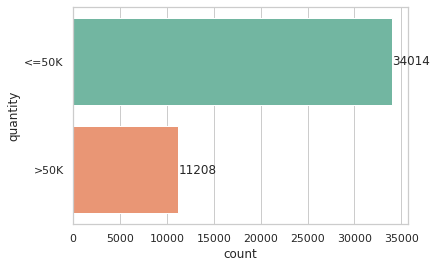

In [ ]:
#bar: count on quantity
ax = sns.countplot(y='quantity', data=df_main_qm, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '1946'),
 Text(0, 0, '3796'),
 Text(0, 0, '33307'),
 Text(0, 0, '1406'),
 Text(0, 0, '3100'),
 Text(0, 0, '1646'),
 Text(0, 0, '21')]

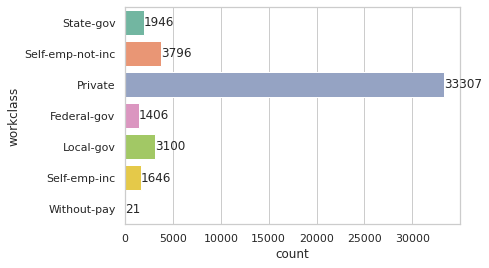

In [ ]:
#bar: count on workclass
ax = sns.countplot(y='workclass', data=df_main_qm, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '7570'),
 Text(0, 0, '14783'),
 Text(0, 0, '1619'),
 Text(0, 0, '2514'),
 Text(0, 0, '676'),
 Text(0, 0, '9899'),
 Text(0, 0, '1507'),
 Text(0, 0, '823'),
 Text(0, 0, '544'),
 Text(0, 0, '1959'),
 Text(0, 0, '785'),
 Text(0, 0, '449'),
 Text(0, 0, '1223'),
 Text(0, 0, '72'),
 Text(0, 0, '577'),
 Text(0, 0, '222')]

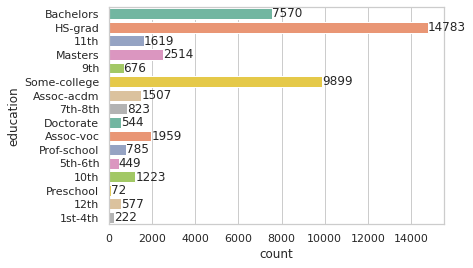

In [ ]:
#bar: count on education
ax = sns.countplot(y='education', data=df_main_qm, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '14598'),
 Text(0, 0, '21055'),
 Text(0, 0, '6297'),
 Text(0, 0, '552'),
 Text(0, 0, '1411'),
 Text(0, 0, '32'),
 Text(0, 0, '1277')]

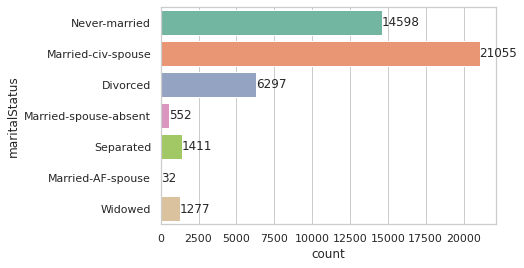

In [ ]:
#bar: count on maritalStatus
ax = sns.countplot(y='maritalStatus', data=df_main_qm, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '5540'),
 Text(0, 0, '5984'),
 Text(0, 0, '2046'),
 Text(0, 0, '6008'),
 Text(0, 0, '4808'),
 Text(0, 0, '5408'),
 Text(0, 0, '2316'),
 Text(0, 0, '1480'),
 Text(0, 0, '2970'),
 Text(0, 0, '1420'),
 Text(0, 0, '6020'),
 Text(0, 0, '976'),
 Text(0, 0, '14'),
 Text(0, 0, '232')]

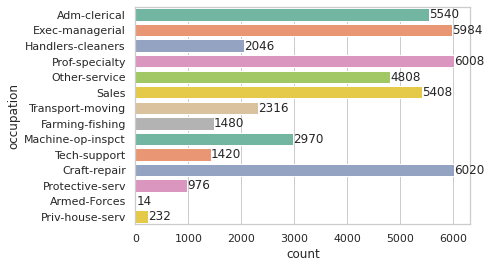

In [ ]:
#bar: count on occupation
ax = sns.countplot(y='occupation', data=df_main_qm, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '11702'),
 Text(0, 0, '18666'),
 Text(0, 0, '2091'),
 Text(0, 0, '6626'),
 Text(0, 0, '4788'),
 Text(0, 0, '1349')]

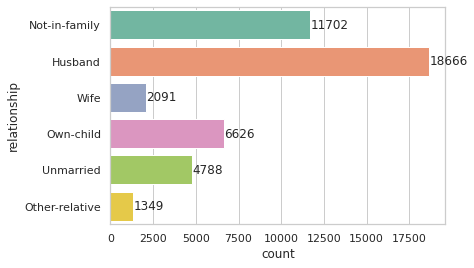

In [ ]:
#bar: count on relationship
ax = sns.countplot(y='relationship', data=df_main_qm, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '38903'),
 Text(0, 0, '4228'),
 Text(0, 0, '1303'),
 Text(0, 0, '435'),
 Text(0, 0, '353')]

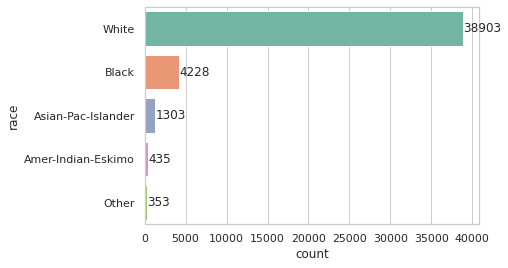

In [ ]:
#bar: count on race
ax = sns.countplot(y='race', data=df_main_qm, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '30527'), Text(0, 0, '14695')]

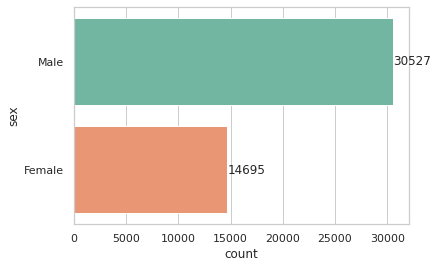

In [ ]:
#bar: count on sex
ax = sns.countplot(y='sex', data=df_main_qm, palette='Set2')
ax.bar_label(ax.containers[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


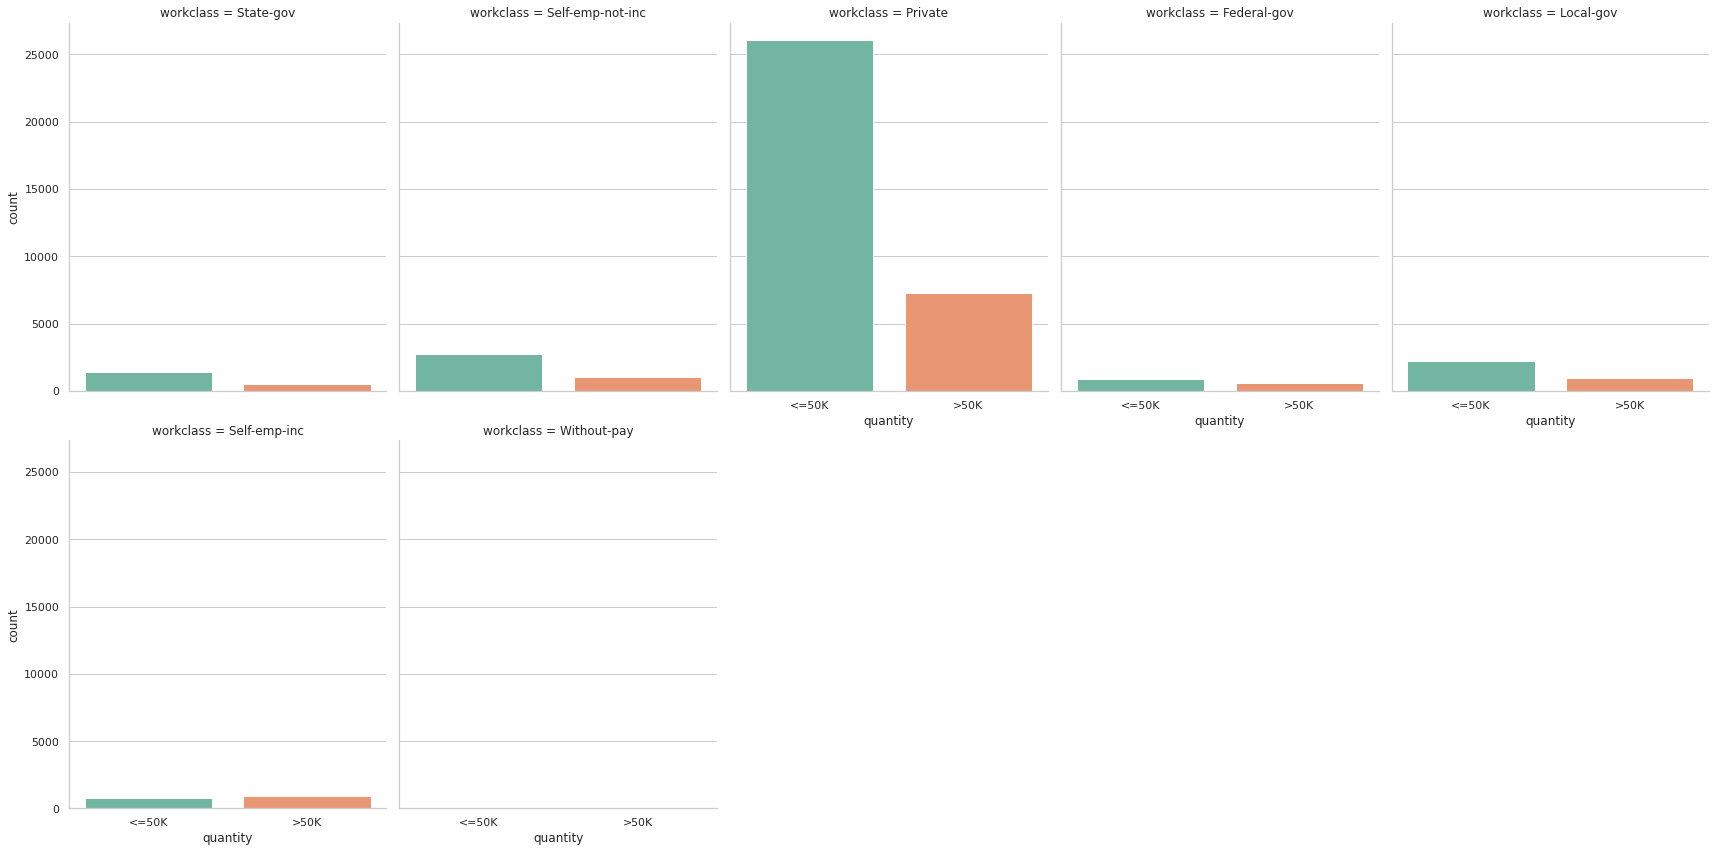

In [ ]:
#bar: quantity per workclass
g = sns.catplot("quantity", col="workclass", col_wrap=5, data=df_main_qm, kind="count",height=6, aspect=0.8, palette='Set2',legend=True)
plt.show()

[Text(0, 0, '41292'),
 Text(0, 0, '133'),
 Text(0, 0, '103'),
 Text(0, 0, '147'),
 Text(0, 0, '903'),
 Text(0, 0, '175'),
 Text(0, 0, '19'),
 Text(0, 0, '119'),
 Text(0, 0, '163'),
 Text(0, 0, '193'),
 Text(0, 0, '56'),
 Text(0, 0, '283'),
 Text(0, 0, '81'),
 Text(0, 0, '82'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '43'),
 Text(0, 0, '21'),
 Text(0, 0, '55'),
 Text(0, 0, '69'),
 Text(0, 0, '62'),
 Text(0, 0, '97'),
 Text(0, 0, '147'),
 Text(0, 0, '36'),
 Text(0, 0, '86'),
 Text(0, 0, '100'),
 Text(0, 0, '113'),
 Text(0, 0, '101'),
 Text(0, 0, '89'),
 Text(0, 0, '23'),
 Text(0, 0, '45'),
 Text(0, 0, '22'),
 Text(0, 0, '20'),
 Text(0, 0, '26'),
 Text(0, 0, '49'),
 Text(0, 0, '48'),
 Text(0, 0, '83'),
 Text(0, 0, '28'),
 Text(0, 0, '36'),
 Text(0, 0, '18'),
 Text(0, 0, '1')]

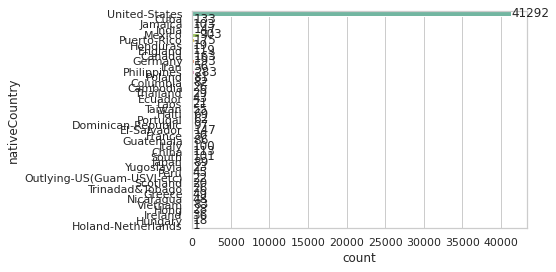

In [ ]:
#bar: count on nativeCountry
ax = sns.countplot(y='nativeCountry', data=df_main_qm, palette='Set2')
ax.bar_label(ax.containers[0])

## Single boxplots on attributes

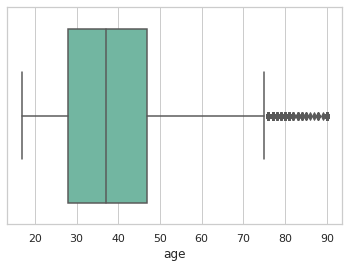

In [ ]:
#box: count on age
ax = sns.boxplot(x="age", data=df_main_qm, palette='Set2')
plt.show()

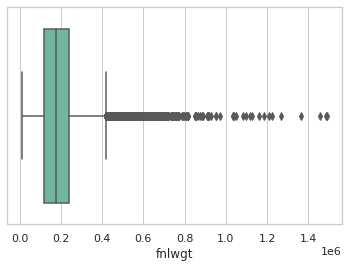

In [ ]:
#box: count on fnlwgt
ax = sns.boxplot(x="fnlwgt", data=df_main_qm, palette='Set2')
plt.show()

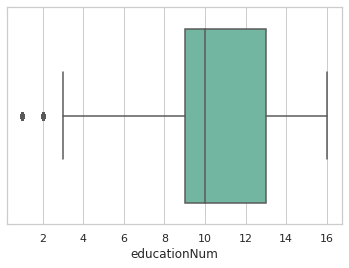

In [ ]:
#box: count on educationNum
ax = sns.boxplot(x="educationNum", data=df_main_qm, palette='Set2')
plt.show()

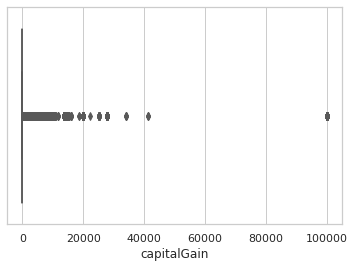

In [ ]:
#box: count on capitalGain
ax = sns.boxplot(x="capitalGain", data=df_main_qm, palette='Set2')
plt.show()

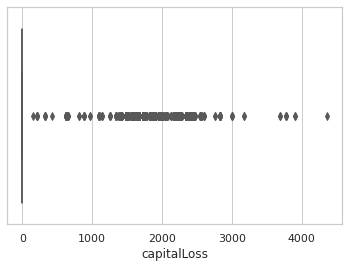

In [ ]:
#box: count on capitalLoss
ax = sns.boxplot(x="capitalLoss", data=df_main_qm, palette='Set2')
plt.show()

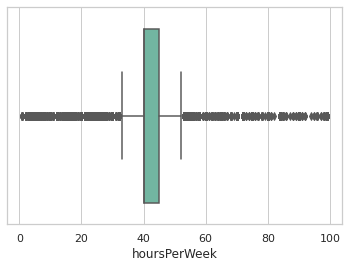

In [ ]:
#box: count on hoursPerWeek
ax = sns.boxplot(x="hoursPerWeek", data=df_main_qm, palette='Set2')
plt.show()

## Bar and boxplots: quantity vs other attributes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


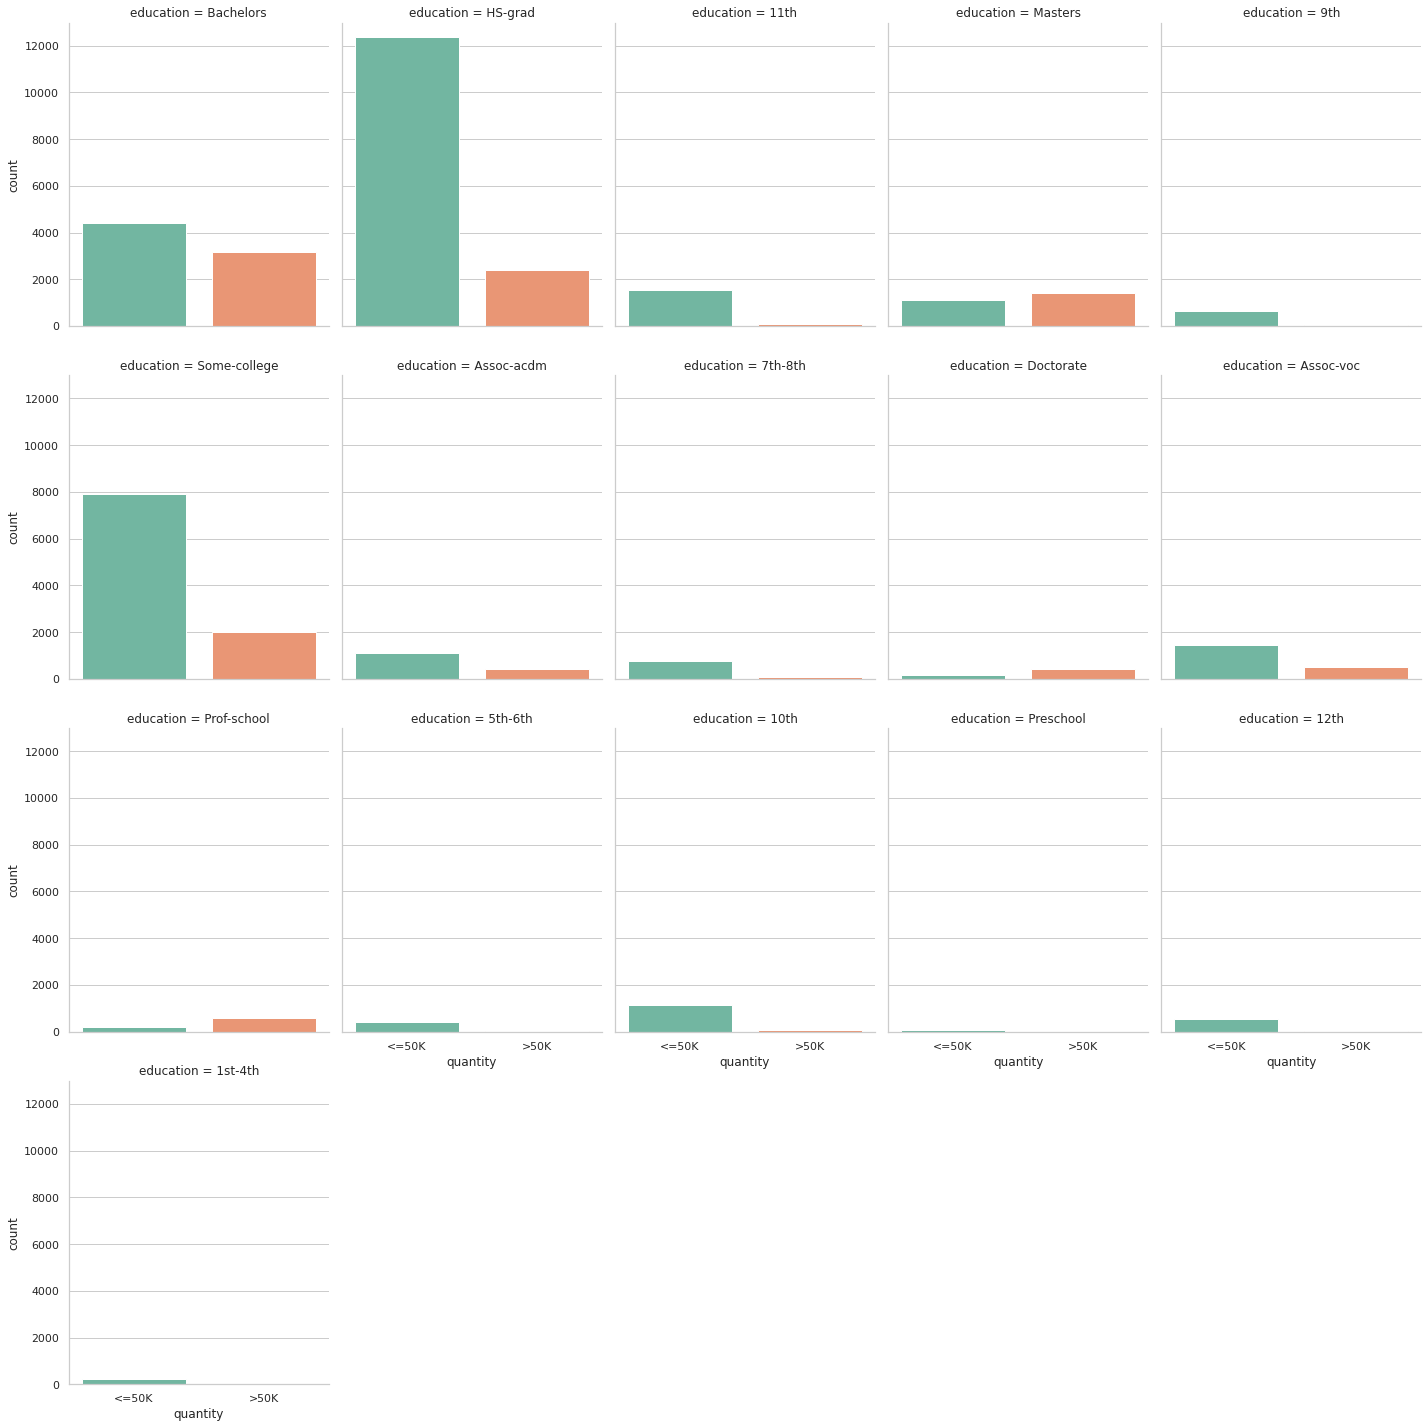

In [ ]:
g = sns.catplot("quantity", col="education", col_wrap=5, data=df_main_qm, kind="count",height=5, aspect=0.8, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


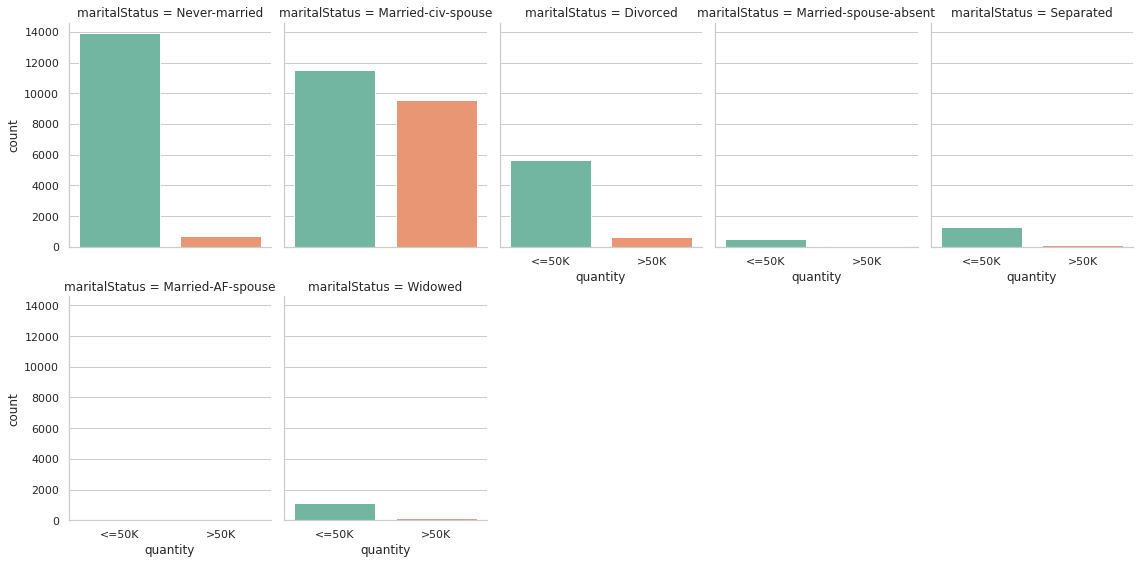

In [ ]:
g = sns.catplot("quantity", col="maritalStatus", col_wrap=5, data=df_main_qm, kind="count",height=4, aspect=0.8, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


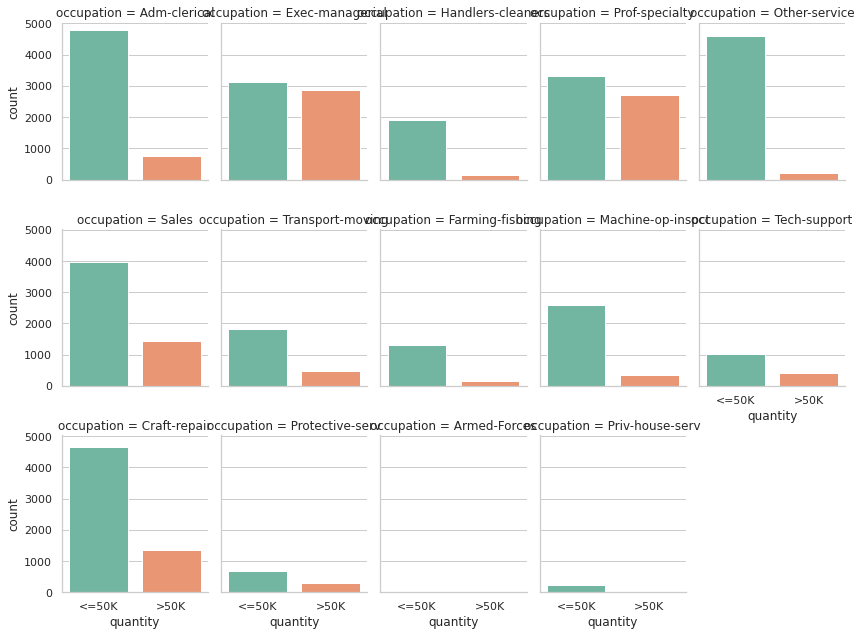

In [ ]:
g = sns.catplot("quantity", col="occupation", col_wrap=5, data=df_main_qm, kind="count",height=3, aspect=0.8, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


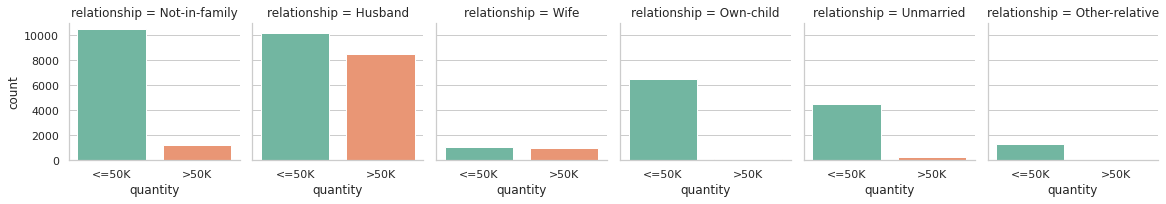

In [ ]:
g = sns.catplot("quantity", col="relationship", col_wrap=7, data=df_main_qm, kind="count",height=3, aspect=0.9, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


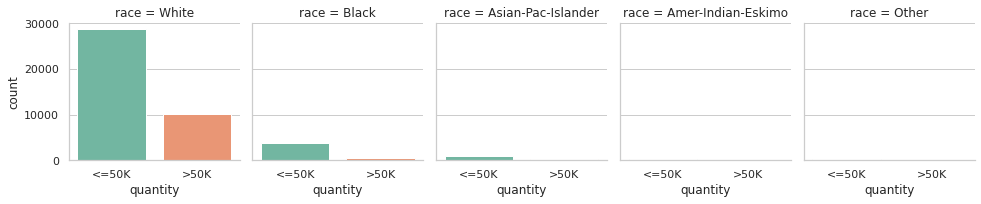

In [ ]:
g = sns.catplot("quantity", col="race", col_wrap=7, data=df_main_qm, kind="count",height=3, aspect=0.9, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


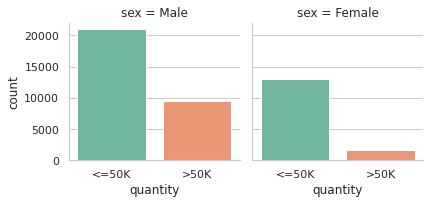

In [ ]:
g = sns.catplot("quantity", col="sex", col_wrap=7, data=df_main_qm, kind="count",height=3, aspect=0.9, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


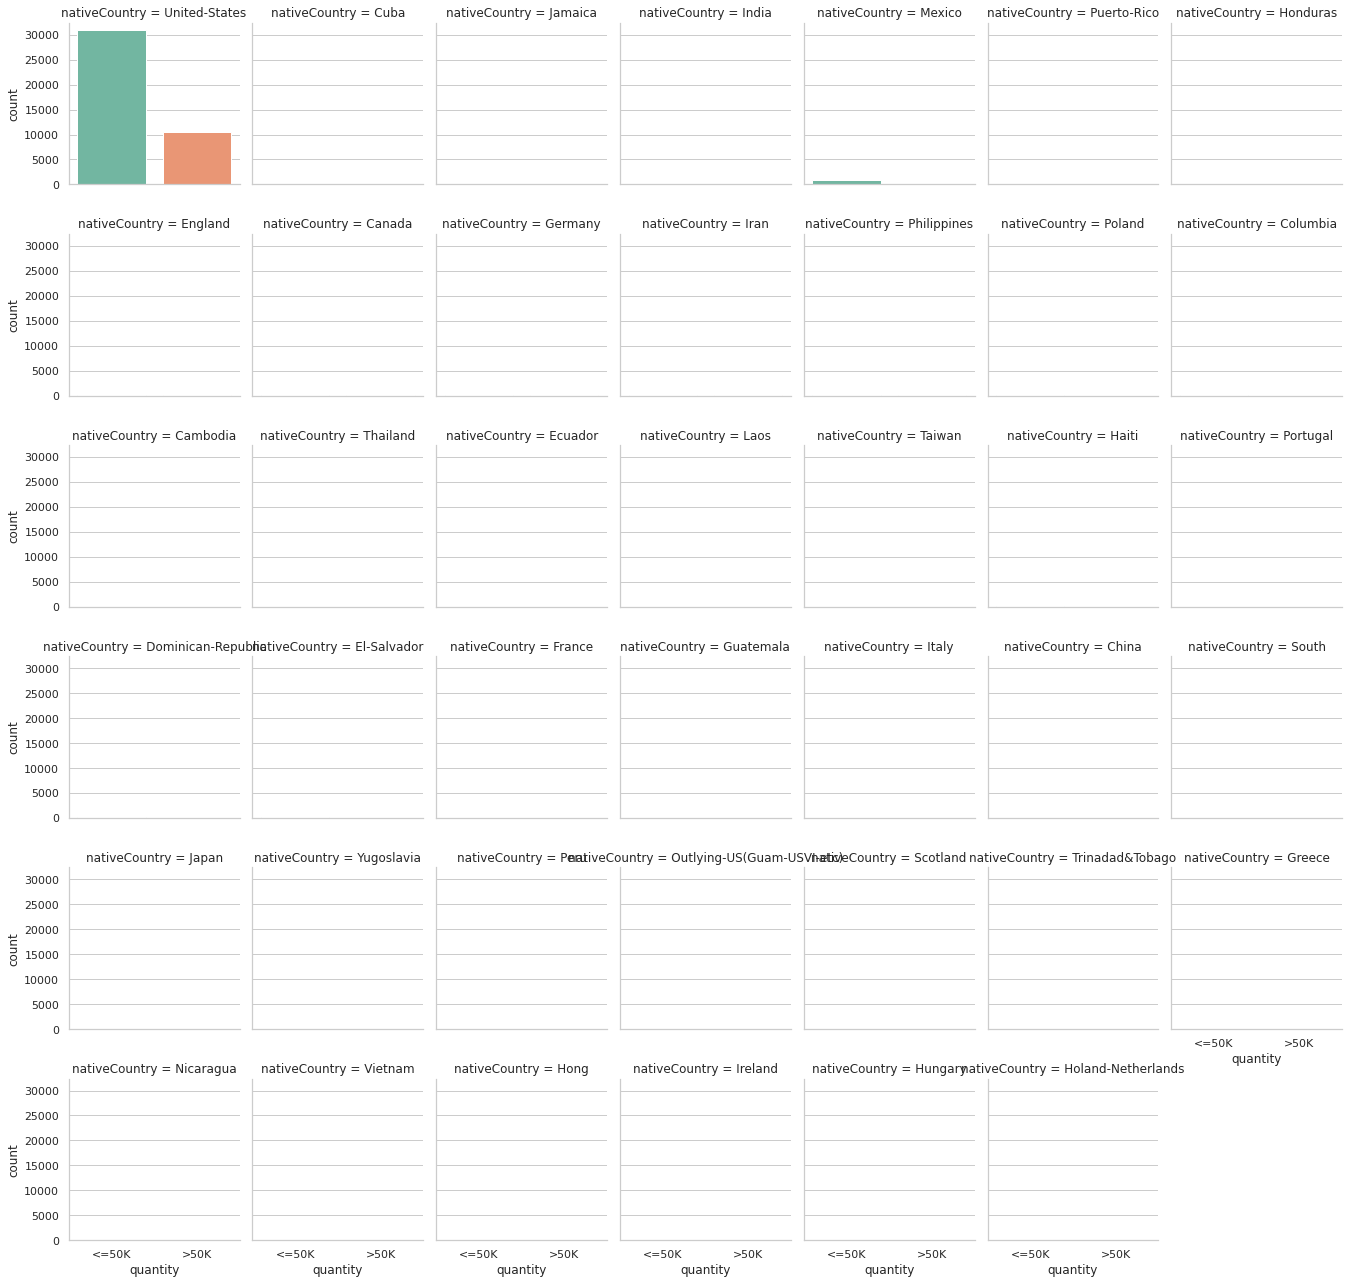

In [ ]:
g = sns.catplot("quantity", col="nativeCountry", col_wrap=7, data=df_main_qm, kind="count",height=3, aspect=0.9, palette='Set2',legend=True)
plt.show()

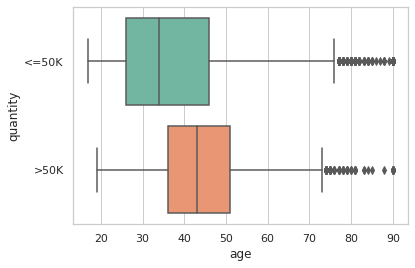

In [ ]:
ax = sns.boxplot(x="age", y="quantity", data=df_main_qm, palette='Set2')
plt.show()

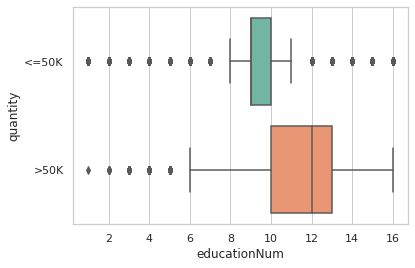

In [ ]:

ax = sns.boxplot(x="educationNum", y="quantity", data=df_main_qm, palette='Set2')
plt.show()

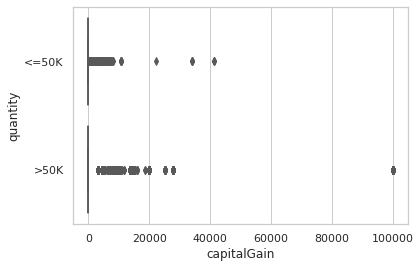

In [ ]:
ax = sns.boxplot(x="capitalGain", y="quantity", data=df_main_qm, palette='Set2')
plt.show()

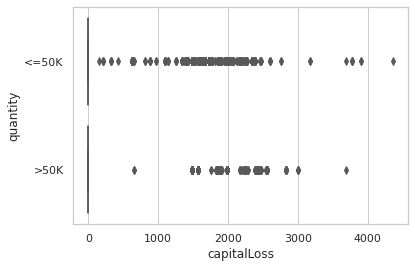

In [ ]:
ax = sns.boxplot(x="capitalLoss", y="quantity", data=df_main_qm, palette='Set2')
plt.show()

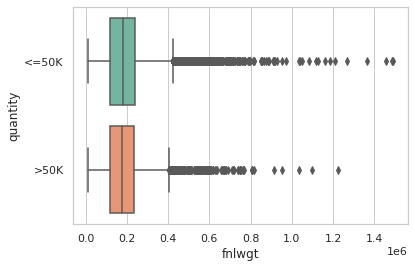

In [ ]:
ax = sns.boxplot(x="fnlwgt", y="quantity", data=df_main_qm, palette='Set2')
plt.show()

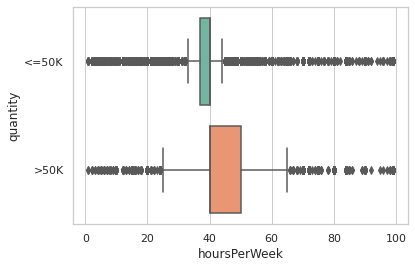

In [ ]:
ax = sns.boxplot(x="hoursPerWeek", y="quantity", data=df_main_qm, palette='Set2')
plt.show()

## Correlation Matrix

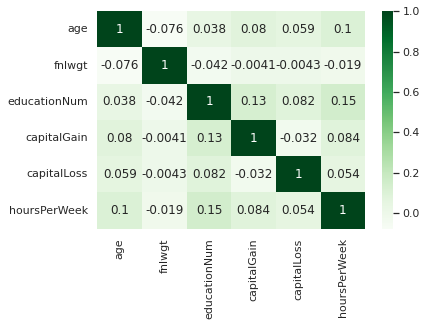

In [ ]:
#print correlation matrix of numerical variable
t = df_main_qm.drop(columns=["workclass", "education","maritalStatus","occupation","relationship","race","sex","nativeCountry"])
tcorrMatrix = t.corr()
sns.heatmap(tcorrMatrix, annot=True, cmap="Greens") #colors: YlGnBu, Blues, BuPu, Greens, PiYG
plt.show()

# **Cleaning dataset**

Macro-categories for categorical attributes
Removing outliers for numerical attributes

In [ ]:
#cleaning: reduce to macro-categories in maritalStatus
df_main_maritalStatus = df_main_qm.replace(["Married-civ-spouse","Married-spouse-absent","Married-AF-spouse","Separated"],["Married","Married","Married","Divorced"])

In [ ]:
#cleaning: reduce to macro-categories in race
df_main_race = df_main_maritalStatus.replace(["Asian-Pac-Islander","Amer-Indian-Eskimo"],"Other")

In [ ]:
#cleaning: reduce to macro-categories workclass
df_main_workclass = df_main_race.replace(["State-gov","Federal-gov","Local-gov","Self-emp-not-inc","Self-emp-inc"],["Gov","Gov","Gov","Self-emp","Self-emp"])
df_main_workclass_wp = df_main_workclass[(df_main_workclass.workclass != "Without-pay")]

In [ ]:
#remove outliers from age
Q1 = df_main_workclass_wp['age'].quantile(0.25)
Q3 = df_main_workclass_wp['age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_main_workclass_wp['age'] >= Q1 - 1.5 * IQR) & (df_main_workclass_wp['age'] <= Q3 + 1.5 *IQR)
df_main_age = df_main_workclass_wp.loc[filter]

In [ ]:
#remove outliers from educationNum
Q1 = df_main_age['educationNum'].quantile(0.25)
Q3 = df_main_age['educationNum'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_main_age['educationNum'] >= Q1 - 1.5 * IQR) & (df_main_age['educationNum'] <= Q3 + 1.5 *IQR)
df_main_educationNum = df_main_age.loc[filter]

In [ ]:
#remove outliers from hoursPerWeek
Q1 = df_main_educationNum['hoursPerWeek'].quantile(0.25)
Q3 = df_main_educationNum['hoursPerWeek'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_main_educationNum['hoursPerWeek'] >= Q1 - 1.5 * IQR) & (df_main_educationNum['hoursPerWeek'] <= Q3 + 1.5 *IQR)
df_main_hoursPerWeek = df_main_educationNum.loc[filter]

In [ ]:
#create a temp df in order to convert all !USA into "other"
tmp = df_main_hoursPerWeek['nativeCountry'].unique()
tmp1 = list(tmp)
tmp1.remove('United-States')
#print(tmp1)

df_main_nativeCountry = df_main_hoursPerWeek.replace(tmp1,"Other")

In [ ]:
#cleaning: reduce to macro-categories education (macro: Doctorate, Masters, Bachelors, Assoc-degree, HS-grad, Non-HS-grad)
df_main_education_noHS = df_main_nativeCountry.replace(["Preschool","1st-4th","5th-6th","7th-8th","9th","10th","11th","12th"],"Non-HS-grad")
df_main_education_assoc = df_main_education_noHS.replace(["Assoc-acdm","Assoc-voc"],"Assoc-degree")
df_main_education = df_main_education_assoc.replace(["Prof-school"],"Doctorate")

In [ ]:
#cleaning: remove duplicate values
df_main_dropdupl = df_main_education.drop_duplicates()

# **Cleaned dataset exploration through graphs**

## Single bars on attributes

[Text(0, 0, '24359'), Text(0, 0, '8611')]

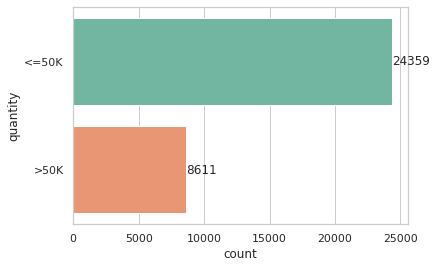

In [ ]:
#bar: count on quantity
ax = sns.countplot(y='quantity', data=df_main_dropdupl, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '5151'), Text(0, 0, '24737'), Text(0, 0, '3082')]

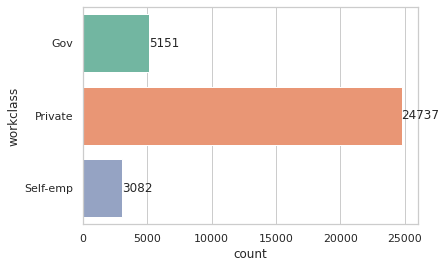

In [ ]:
#bar: count on workclass
ax = sns.countplot(y='workclass', data=df_main_dropdupl, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '5786'),
 Text(0, 0, '11417'),
 Text(0, 0, '3535'),
 Text(0, 0, '1857'),
 Text(0, 0, '2709'),
 Text(0, 0, '6860'),
 Text(0, 0, '806')]

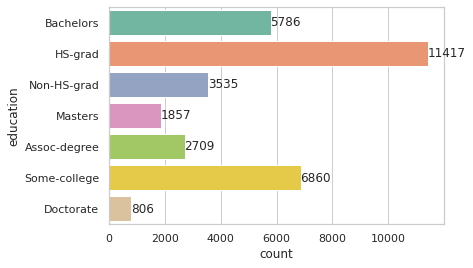

In [ ]:
#bar: count on education
ax = sns.countplot(y='education', data=df_main_dropdupl, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '9751'),
 Text(0, 0, '6071'),
 Text(0, 0, '16412'),
 Text(0, 0, '736')]

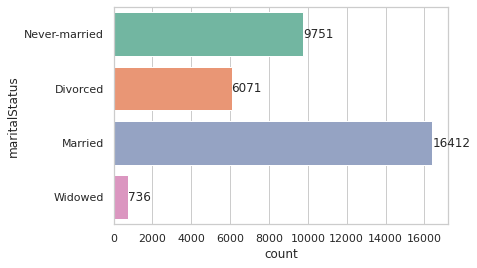

In [ ]:
#bar: count on maritalStatus
ax = sns.countplot(y='maritalStatus', data=df_main_dropdupl, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '4332'),
 Text(0, 0, '1498'),
 Text(0, 0, '4402'),
 Text(0, 0, '4491'),
 Text(0, 0, '3454'),
 Text(0, 0, '1640'),
 Text(0, 0, '788'),
 Text(0, 0, '2577'),
 Text(0, 0, '1148'),
 Text(0, 0, '5060'),
 Text(0, 0, '748'),
 Text(0, 0, '2733'),
 Text(0, 0, '12'),
 Text(0, 0, '87')]

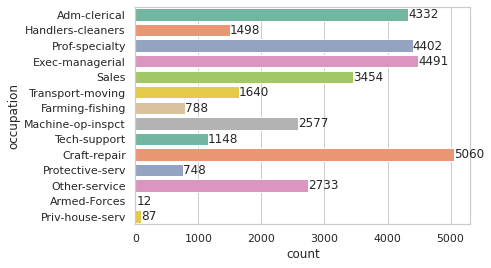

In [ ]:
#bar: count on occupation
ax = sns.countplot(y='occupation', data=df_main_dropdupl, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '8765'),
 Text(0, 0, '14275'),
 Text(0, 0, '1499'),
 Text(0, 0, '3792'),
 Text(0, 0, '3689'),
 Text(0, 0, '950')]

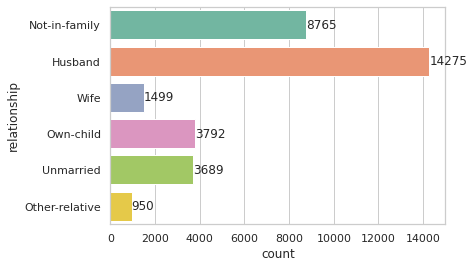

In [ ]:
#bar: count on relationship
ax = sns.countplot(y='relationship', data=df_main_dropdupl, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '28120'), Text(0, 0, '3298'), Text(0, 0, '1552')]

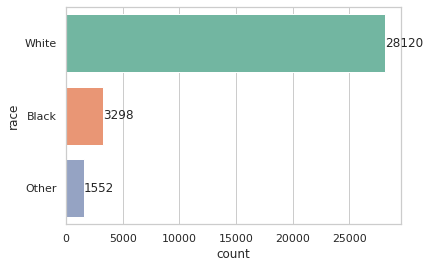

In [ ]:
#bar: count on race
ax = sns.countplot(y='race', data=df_main_dropdupl, palette='Set2')
ax.bar_label(ax.containers[0])

[Text(0, 0, '22804'), Text(0, 0, '10166')]

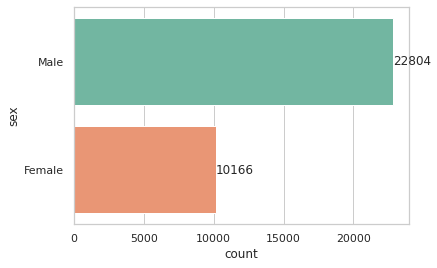

In [ ]:
#bar: count on sex
ax = sns.countplot(y='sex', data=df_main_dropdupl, palette='Set2')
ax.bar_label(ax.containers[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


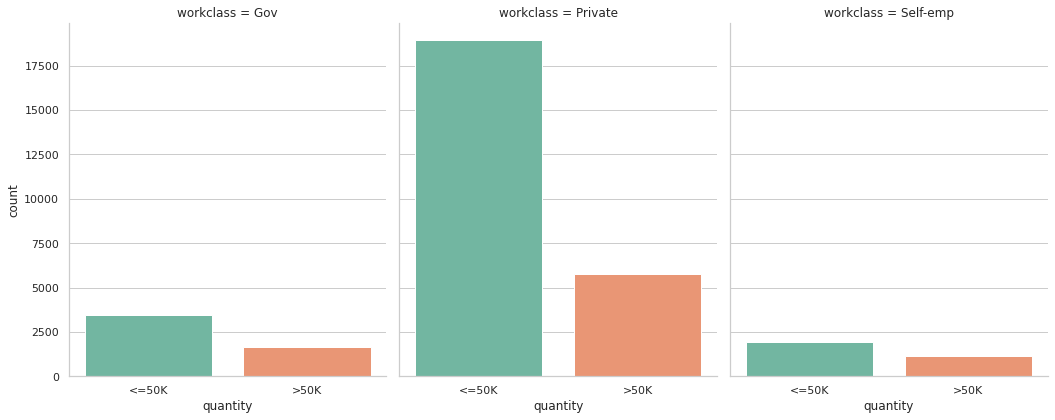

In [ ]:
#bar: quantity per workclass
g = sns.catplot("quantity", col="workclass", col_wrap=5, data=df_main_dropdupl, kind="count",height=6, aspect=0.8, palette='Set2',legend=True)
plt.show()

[Text(0, 0, '30140'), Text(0, 0, '2830')]

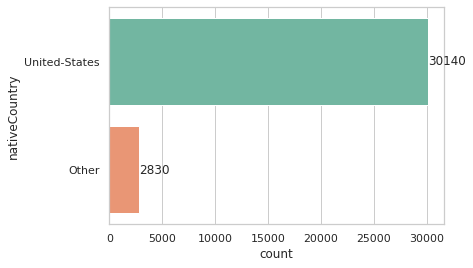

In [ ]:
#bar: count on nativeCountry
ax = sns.countplot(y='nativeCountry', data=df_main_dropdupl, palette='Set2')
ax.bar_label(ax.containers[0])

## Single boxplots on attributes

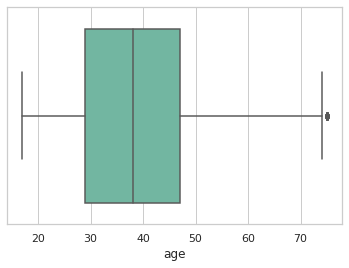

In [ ]:
#box: count on age
ax = sns.boxplot(x="age", data=df_main_dropdupl, palette='Set2')
plt.show()

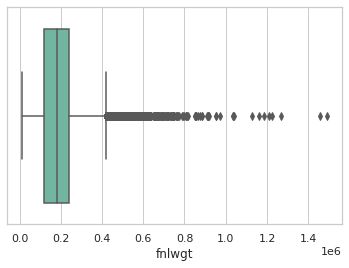

In [ ]:
#box: count on fnlwgt
ax = sns.boxplot(x="fnlwgt", data=df_main_dropdupl, palette='Set2')
plt.show()

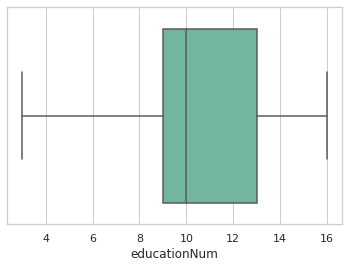

In [ ]:
#box: count on educationNum
ax = sns.boxplot(x="educationNum", data=df_main_dropdupl, palette='Set2')
plt.show()

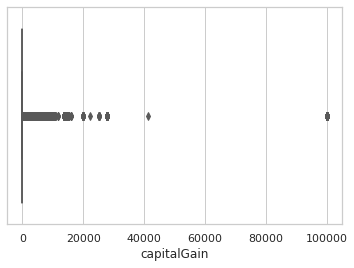

In [ ]:
#box: count on capitalGain
ax = sns.boxplot(x="capitalGain", data=df_main_dropdupl, palette='Set2')
plt.show()

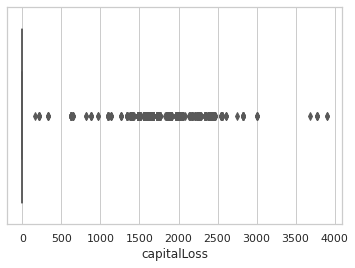

In [ ]:
#box: count on capitalLoss
ax = sns.boxplot(x="capitalLoss", data=df_main_dropdupl, palette='Set2')
plt.show()

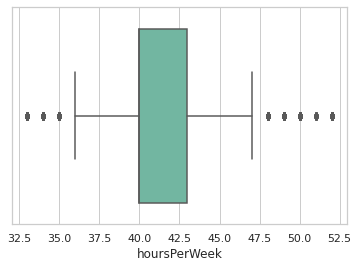

In [ ]:
#box: count on hoursPerWeek
ax = sns.boxplot(x="hoursPerWeek", data=df_main_dropdupl, palette='Set2')
plt.show()

## Bar and boxplots: quantity vs other attributes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


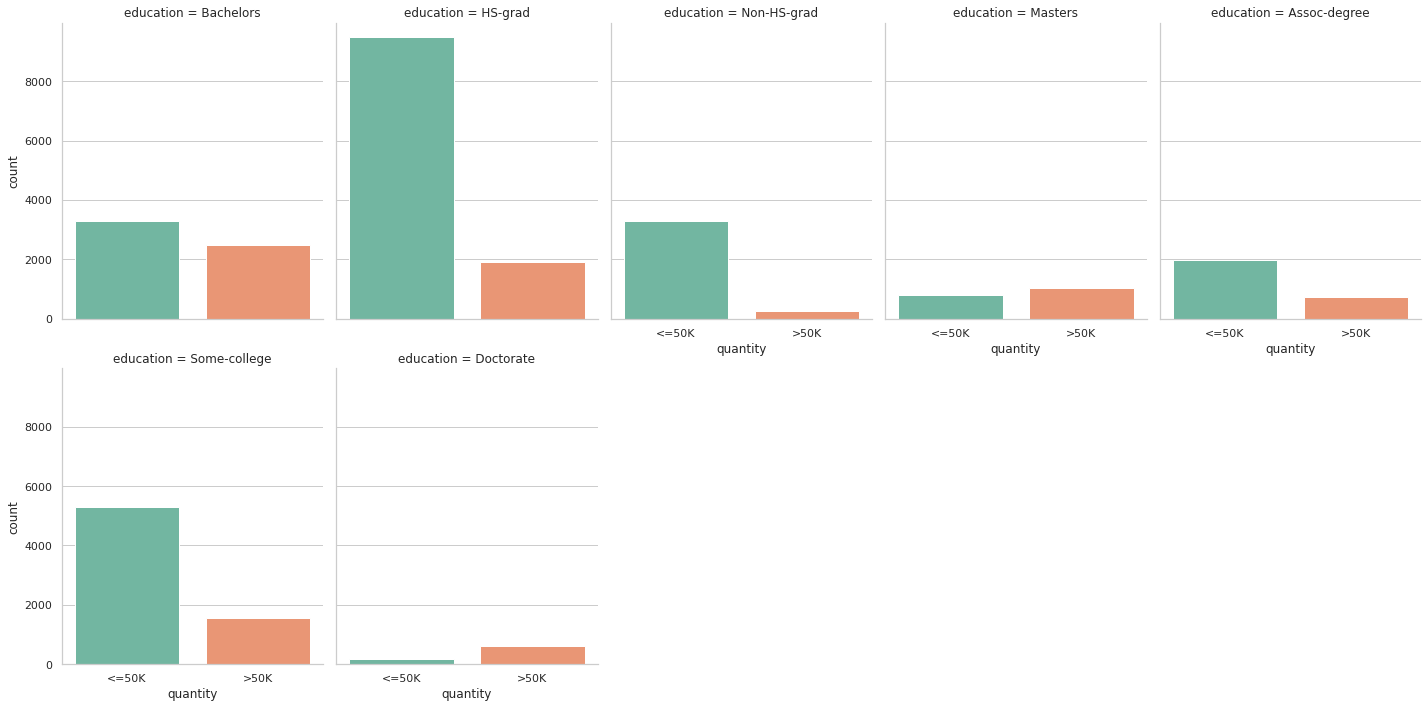

In [ ]:
g = sns.catplot("quantity", col="education", col_wrap=5, data=df_main_dropdupl, kind="count",height=5, aspect=0.8, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


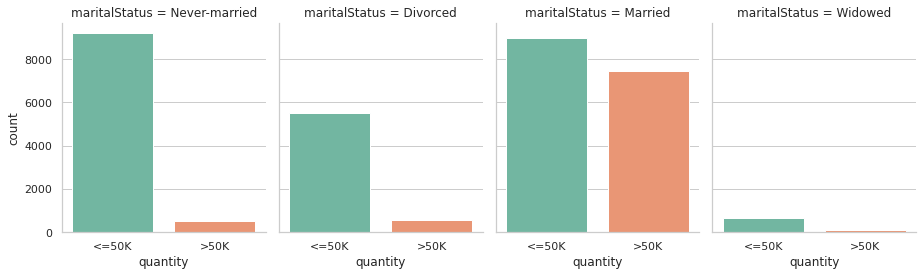

In [ ]:
g = sns.catplot("quantity", col="maritalStatus", col_wrap=5, data=df_main_dropdupl, kind="count",height=4, aspect=0.8, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


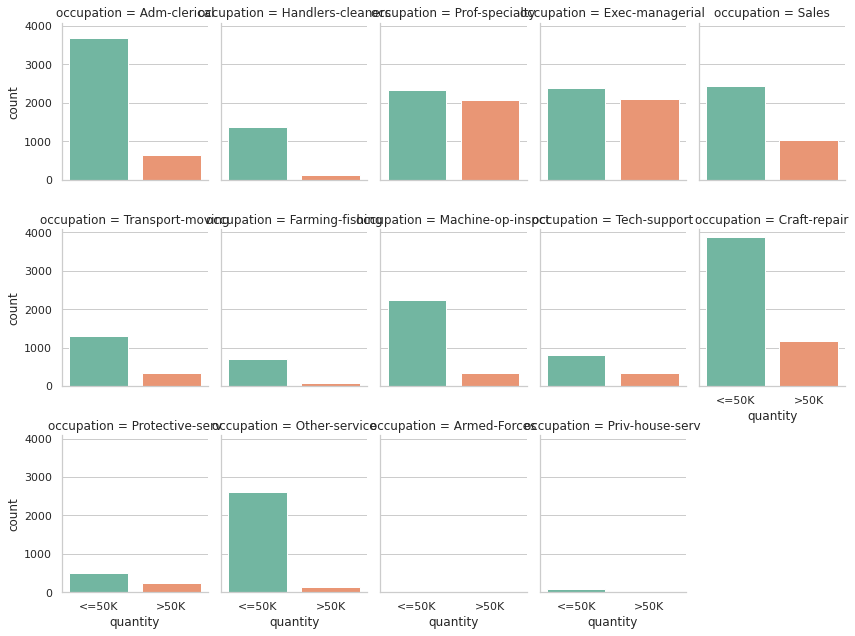

In [ ]:
g = sns.catplot("quantity", col="occupation", col_wrap=5, data=df_main_dropdupl, kind="count",height=3, aspect=0.8, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


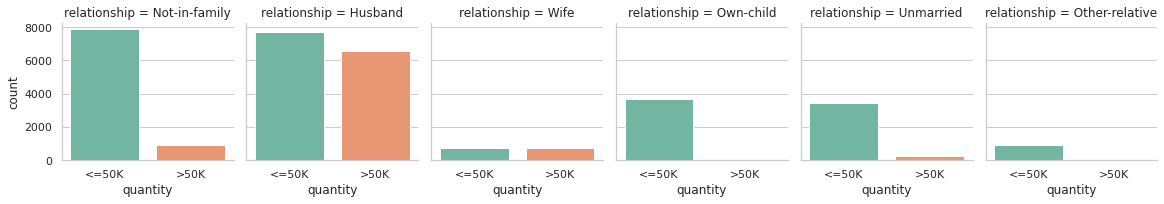

In [ ]:
g = sns.catplot("quantity", col="relationship", col_wrap=7, data=df_main_dropdupl, kind="count",height=3, aspect=0.9, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


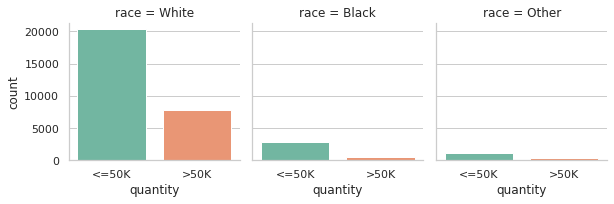

In [ ]:
g = sns.catplot("quantity", col="race", col_wrap=7, data=df_main_dropdupl, kind="count",height=3, aspect=0.9, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


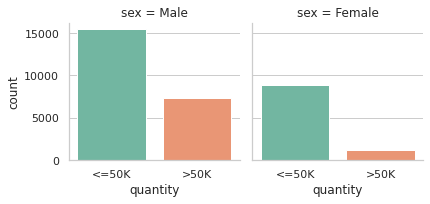

In [ ]:
g = sns.catplot("quantity", col="sex", col_wrap=7, data=df_main_dropdupl, kind="count",height=3, aspect=0.9, palette='Set2',legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


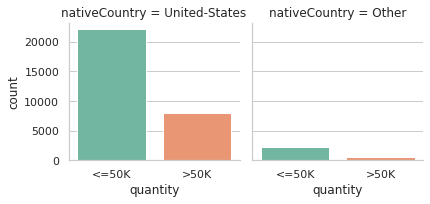

In [ ]:
g = sns.catplot("quantity", col="nativeCountry", col_wrap=7, data=df_main_dropdupl, kind="count",height=3, aspect=0.9, palette='Set2',legend=True)
plt.show()

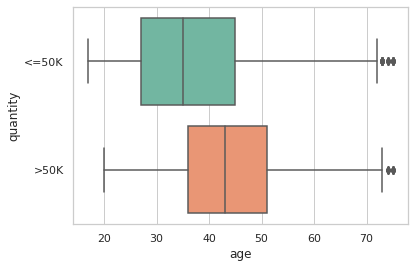

In [ ]:
ax = sns.boxplot(x="age", y="quantity", data=df_main_dropdupl, palette='Set2')
plt.show()

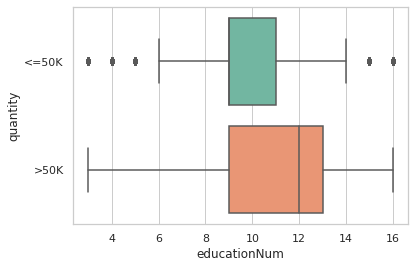

In [ ]:

ax = sns.boxplot(x="educationNum", y="quantity", data=df_main_dropdupl, palette='Set2')
plt.show()

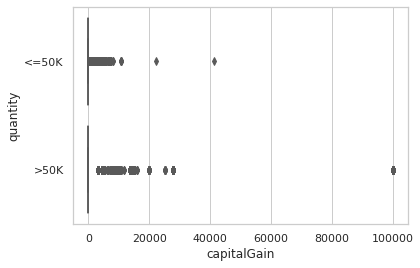

In [ ]:
ax = sns.boxplot(x="capitalGain", y="quantity", data=df_main_dropdupl, palette='Set2')
plt.show()

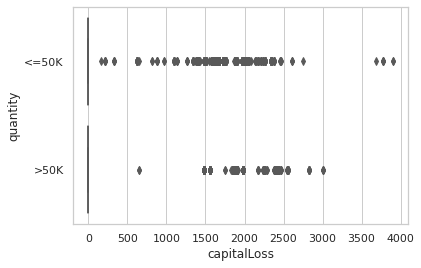

In [ ]:
ax = sns.boxplot(x="capitalLoss", y="quantity", data=df_main_dropdupl, palette='Set2')
plt.show()

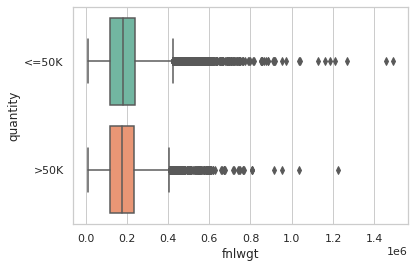

In [ ]:
ax = sns.boxplot(x="fnlwgt", y="quantity", data=df_main_dropdupl, palette='Set2')
plt.show()

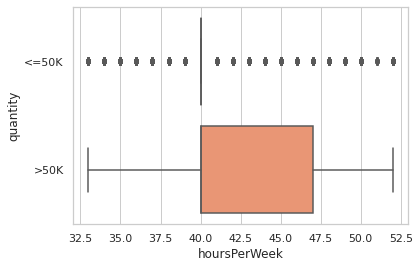

In [ ]:
ax = sns.boxplot(x="hoursPerWeek", y="quantity", data=df_main_dropdupl, palette='Set2')
plt.show()

## Correlation Matrix

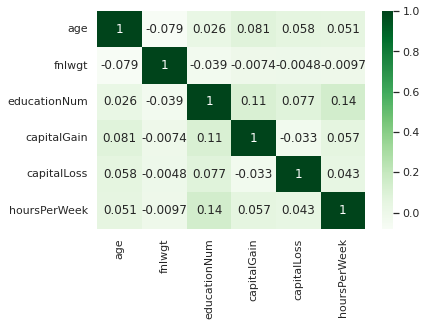

In [ ]:
#print correlation matrix of numerical variable
t = df_main_dropdupl.drop(columns=["workclass", "education","maritalStatus","occupation","relationship","race","sex","nativeCountry"])
tcorrMatrix = t.corr()
sns.heatmap(tcorrMatrix, annot=True, cmap="Greens") #colors: YlGnBu, Blues, BuPu, Greens, PiYG
plt.show()

# **Encoding on adult.data and adult.test**

In [ ]:
df_main_dropdupl.shape

(32970, 15)

In [ ]:
#apply min max scaler to numerical variables in df_main_dropdupl
num_cols = df_main_dropdupl.columns[df_main_dropdupl.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = MinMaxScaler()
df_main_dropdupl[num_cols] = scaler.fit_transform(df_main_dropdupl[num_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
#encoding "quantity":     if "<=50K" 0,    if ">50K" 1
df_main_intQuantity = df_main_dropdupl.replace(["<=50K",">50K"],[0,1])  #quantity becomes an integer

In [ ]:
#convert text into binary code
encoder = ce.OneHotEncoder(cols=['workclass','education','maritalStatus','occupation','relationship','race','sex','nativeCountry']) 
df_main_encode = encoder.fit_transform(df_main_intQuantity)
df_main_encode.shape

(32970, 48)

In [ ]:
#print correlation matrix
corrMatrix2 = df_main_encode.corr()
plt.subplots(figsize=(30,15))

matrix = np.triu(corrMatrix2)
sns.heatmap(corrMatrix2, mask=matrix, cmap="Greens") #colors: YlGnBu, Blues, BuPu, Greens, PiYG  annot=True,
plt.show()

# **Define train and test sets**

In [ ]:
#select column "quantity" and put it into y
y = df_main_encode['quantity']

In [ ]:
#select column != "quantity" and put it into X
X = df_main_encode.drop('quantity', axis=1)

In [ ]:
#split X and y into 4 parts: X,y train_val (=> train and eval during TRAINING) and X,y test (=> test in TESTING)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [ ]:
#the dataset is unbalanced => apply SMOTE to create more data
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train_val, y_train_val)

# **Decision Tree Classifier**

In [ ]:
#define grid parameters
paramDT = {
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
#run GridSearch in order to perform Cross Validation with different parameters
dt_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=paramDT, cv= 10)
dt_cv.fit(X_smote, y_smote)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [ ]:
#explore the best parameters
dt_cv.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [ ]:
#set Decision Tree Classifier on X_train_val and y_train_val with best parameters
dt_final = DecisionTreeClassifier(max_depth = 8, max_features = 'sqrt',criterion = 'gini').fit(X_smote, y_smote)

In [ ]:
#perform Decision Tree Classifier on X_test and print confusion matrix with the results
predictionDT = dt_final.predict(X_test)
confusion_matrix(y_test, predictionDT)

array([[5114, 2194],
       [ 426, 2157]])

In [ ]:
#compute metrics
accuracyDT = accuracy_score(y_test, predictionDT)
f1DT = f1_score(y_test, predictionDT, pos_label=0)
recallDT = recall_score(y_test, predictionDT, pos_label=0)
precisionDT = precision_score(y_test, predictionDT, pos_label=0)

In [ ]:
#print metrics' results
print("Decision Tree Metrics:")
print("Recall: ", recallDT)
print("Accuracy: ", accuracyDT)
print("Precision: ", precisionDT)
print("f1: ", f1DT)

Decision Tree Metrics:
Recall:  0.6997810618500274
Accuracy:  0.735112728743302
Precision:  0.9231046931407942
f1:  0.7960772104607723


# **Random Forest Classifier**

In [ ]:
#define grid parameters
paramRF = { 
    'n_estimators': [200,300], #tested also 400,500
    'max_features': ['sqrt'], #tested also 'log2'
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [ ]:
#run GridSearch in order to perform Cross Validation with different parameters
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=paramRF, cv= 10)
rf_cv.fit(X_smote, y_smote)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8], 'max_features': ['sqrt'],
                         'n_estimators': [200, 300], 'random_state': [18]})

In [ ]:
#explore the best parameters
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [ ]:
#set Random Forest Classifier on X_train_val and y_train_val with best parameters
rf_final = RandomForestClassifier(n_estimators = 300, max_depth = 8, max_features = 'sqrt', random_state = 18, criterion = 'gini').fit(X_smote, y_smote)

In [ ]:
#perform Decision Tree Classifier on X_test and print confusion matrix with the results
predictionRF = rf_final.predict(X_test)
confusion_matrix(y_test, predictionRF)

array([[5570, 1738],
       [ 367, 2216]])

In [ ]:
#compute metrics
accuracyRF = accuracy_score(y_test, predictionRF)
f1RF = f1_score(y_test, predictionRF, pos_label=0)
recallRF = recall_score(y_test, predictionRF, pos_label=0)
precisionRF = precision_score(y_test, predictionRF, pos_label=0)

In [ ]:
#print metrics' results
print("Random Forest Metrics:")
print("Recall: ", recallRF)
print("Accuracy: ", accuracyRF)
print("Precision: ", precisionRF)
print("f1: ", f1RF)

Random Forest Metrics:
Recall:  0.7621784345922277
Accuracy:  0.7871802648872712
Precision:  0.9381842681488968
f1:  0.8410721026802567


# **Logistic Regression Classifier**

In [ ]:
#define grid parameters
paramLR = {
    'penalty' : ['l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['sag'],
    'max_iter': [1000]
}

In [ ]:
#run GridSearch in order to perform Cross Validation with different parameters
lr_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=paramLR, cv= 10)
lr_cv.fit(X_smote, y_smote)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [1000], 'penalty': ['l2'],
                         'solver': ['sag']})

In [ ]:
#explore the best parameters
lr_cv.best_params_

{'C': 10.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}

In [ ]:
#set Logistic Regression on X_train_val and y_train_val with best parameters
lr_final = LogisticRegression(C=10,solver='sag',max_iter=1000).fit(X_smote, y_smote)

In [ ]:
#perform Logistic Regression on X_test and print confusion matrix with the results
predictionLR = lr_final.predict(X_test)
confusion_matrix(y_test, predictionLR)

array([[5982, 1326],
       [ 531, 2052]])

In [ ]:
#compute metrics
accuracyLR = accuracy_score(y_test, predictionLR)
f1LR = f1_score(y_test, predictionLR, pos_label=0)
recallLR = recall_score(y_test, predictionLR, pos_label=0)
precisionLR = precision_score(y_test, predictionLR, pos_label=0)

In [ ]:
#print metrics' results
print("Logistic Regression Metrics:")
print("Recall: ", recallLR)
print("Accuracy: ", accuracyLR)
print("Precision: ", precisionLR)
print("f1: ", f1LR)

Logistic Regression Metrics:
Recall:  0.8185550082101807
Accuracy:  0.8122535638459205
Precision:  0.9184707508060801
f1:  0.8656392446277403


# **KNN Classifier**

In [ ]:
#define grid parameters
paramKNN = {
    'n_neighbors': [10],
    'leaf_size': [30],
    'p': [2]
}

In [ ]:
#run GridSearch in order to perform Cross Validation with different parameters
knn_cv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=paramKNN, n_jobs = -1, cv= 10)
knn_cv.fit(X_smote, y_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [30], 'n_neighbors': [10], 'p': [2]})

In [ ]:
#explore the best parameters
knn_cv.best_params_

{'leaf_size': 30, 'n_neighbors': 10, 'p': 2}

In [ ]:
#set KNN Classifier on X_train_val and y_train_val with best parameters
knn_final = KNeighborsClassifier(n_neighbors=10, p=2, leaf_size=30).fit(X_smote, y_smote)

In [ ]:
#perform KNN Classifier on X_test and print confusion matrix with the results
predictionKNN = knn_final.predict(X_test)
confusion_matrix(y_test, predictionKNN)

array([[5749, 1559],
       [ 667, 1916]])

In [ ]:
#compute metrics
accuracyKNN = accuracy_score(y_test, predictionKNN)
f1KNN = f1_score(y_test, predictionKNN, pos_label=0)
recallKNN = recall_score(y_test, predictionKNN, pos_label=0)
precisionKNN = precision_score(y_test, predictionKNN, pos_label=0)

In [ ]:
#print metrics' results
print("KNN metrics:")
print("Recall: ", recallKNN)
print("Accuracy: ", accuracyKNN)
print("Precision: ", precisionKNN)
print("f1: ", f1KNN)

KNN metrics:
Recall:  0.786672140120416
Accuracy:  0.7749469214437368
Precision:  0.8960411471321695
f1:  0.8378023899737687


# **Conclusion graphs**

## Recall graph

In [ ]:
data_recall = {'Method': ["LR", "DT", "RF", "KNN"], 'Recall': [recallLR, recallDT, recallRF, recallKNN]}
df_recall = pd.DataFrame(data=data_recall)
df_recall

,Method,Recall
0,LR,0.818555
1,DT,0.699781
2,RF,0.762178
3,KNN,0.786672


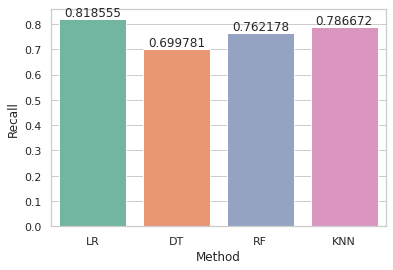

In [ ]:
ax = sns.barplot(x='Method', y='Recall', data=df_recall, palette='Set2')
ax.bar_label(ax.containers[0])
plt.show()

## Precision graph

In [ ]:
data_precision = {'Method': ["LR", "DT", "RF", "KNN"], 'Precision': [precisionLR, precisionDT, precisionRF, precisionKNN]}
df_precision = pd.DataFrame(data=data_precision)
df_precision

,Method,Precision
0,LR,0.918471
1,DT,0.923105
2,RF,0.938184
3,KNN,0.896041


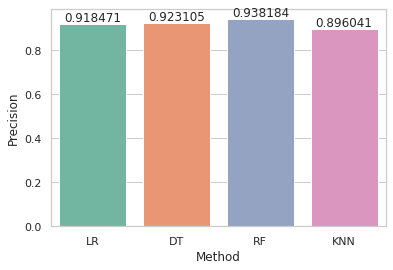

In [ ]:
ax = sns.barplot(x='Method', y='Precision', data=df_precision, palette='Set2')
ax.bar_label(ax.containers[0])
plt.show()

## Accuracy graph

In [ ]:
data_accuracy = {'Method': ["LR", "DT", "RF", "KNN"], 'Accuracy': [accuracyLR, accuracyDT, accuracyRF, accuracyKNN]}
df_accuracy = pd.DataFrame(data=data_accuracy)
df_accuracy

,Method,Accuracy
0,LR,0.812254
1,DT,0.735113
2,RF,0.787180
3,KNN,0.774947


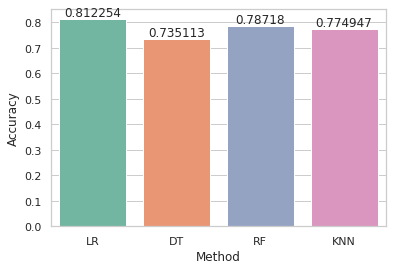

In [ ]:
ax = sns.barplot(x='Method', y='Accuracy', data=df_accuracy, palette='Set2')
ax.bar_label(ax.containers[0])
plt.show()

## F1 graph

In [ ]:
data_f1 = {'Method': ["LR", "DT", "RF", "KNN"], 'F1': [f1LR, f1DT, f1RF, f1KNN]}
df_f1 = pd.DataFrame(data=data_f1)
df_f1

,Method,F1
0,LR,0.865639
1,DT,0.796077
2,RF,0.841072
3,KNN,0.837802


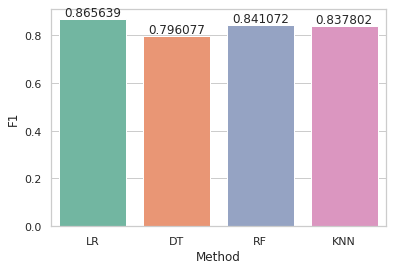

In [ ]:
ax = sns.barplot(x='Method', y='F1', data=df_f1, palette='Set2')
ax.bar_label(ax.containers[0])
plt.show()